## 1. Upload libraries and dataset

In [26]:
from decimal import Rounded
from itertools import groupby
from statistics import mode
from urllib.parse import scheme_chars
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

The data is being uploaded from the pre-processed csv file that has been cleaned using the file "script_data_processing.py"

In [27]:
pd.set_option('display.max_columns', None)
filename = "Data_Processing/football_cleaned_data.csv"
model_df = pd.read_csv(filename)
model_df

,Home_Team,Away_Team,Link,Result,Wins,Season,League,Round,Referee,Stadium,Capacity,Pitch,Country,HT_Link,HT_total_score_so_far_season,Elo_home,Home_Score,HT_home_total_scores_season,HT_home_total_wins_season,HT_home_total_losses_season,HT_home_total_draws_season,Home_Yellow,Home_Red,AT_Link,AT_total_score_so_far_season,Elo_away,Away_Score,AT_away_total_scores_season,AT_away_total_wins_season,AT_away_total_losses_season,AT_away_total_draws_season,Away_Yellow,Away_Red
0,Ingolstadt 04,Energie Cottbus,https://www.besoccer.com/match/fc-ingolstadt-0...,2-2,0,2013,2_liga,1,T. Welz,Audi-Sportpark,15729,natural,Germany,fc-ingolstadt-04,0,47,2,2,0,0,1,1,0,energie-cottbus,0,62,2,2,0,0,1,0,0
1,Erzgebirge Aue,FC St. Pauli,https://www.besoccer.com/match/fc-erzgebirge-a...,0-0,0,2013,2_liga,1,M. Wein,Sparkassen-Erzgebirgsstadion,15690,natural,Germany,fc-erzgebirge-aue,0,55,0,0,0,0,1,0,0,st-pauli,0,57,0,0,0,0,1,2,0
2,Hertha BSC,Paderborn,https://www.besoccer.com/match/hertha-bsc/pade...,2-2,0,2013,2_liga,1,D. Aytekin,Olympiastadion Berlin,76065,natural,Germany,hertha-bsc,0,67,2,2,0,0,1,2,0,paderborn,0,54,2,2,0,0,1,3,0
3,1860 München,Jahn Regensburg,https://www.besoccer.com/match/1860-munchen/ss...,1-0,1,2013,2_liga,1,B. Dankert,Grünwalder Stadion,75000,natural,Germany,1860-munchen,0,64,1,1,1,0,0,1,0,ssv-jahn-regensburg,0,40,0,0,0,1,0,2,0
4,VfL Bochum,Dynamo Dresden,https://www.besoccer.com/match/bochum/sg-dynam...,2-1,1,2013,2_liga,1,R. Hartmann,rewirpowerSTADION,30748,natural,Germany,bochum,0,63,2,2,1,0,0,1,0,sg-dynamo-dresden,0,49,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44777,Pisa,Vicenza,https://www.besoccer.com/match/pisa-calcio/vic...,2-2,0,2021,serie_b,25,Dionisi F.,Arena Garibaldi - Stadio Romeo Anconetani,17500,natural,Italy,pisa-calcio,32,55,2,15,4,1,8,5,0,vicenza-calcio,31,48,2,19,4,5,4,1,0
44778,Pescara,Lecce,https://www.besoccer.com/match/pescara-calcio/...,1-1,0,2021,serie_b,25,Robilotta I.,Stadio Adriatico-Giovanni Cornacchia,23800,natural,Italy,pescara-calcio,18,58,1,11,2,7,4,1,0,lecce,43,59,1,18,5,2,5,1,0
44779,SPAL,Reggina,https://www.besoccer.com/match/spal-1907/reggi...,1-4,-1,2021,serie_b,25,Prontera A.,Stadio Paolo Mazza,17900,natural,Italy,spal-1907,32,60,1,21,6,3,4,3,1,reggina,23,39,4,16,3,4,6,4,0
44780,AC Monza,Cittadella,https://www.besoccer.com/match/ac-monza-brianz...,0-0,0,2021,serie_b,25,Ros R.,Stadio Comunale Brianteo,18568,natural,Italy,ac-monza-brianza-1912,33,51,0,18,5,2,5,2,0,as-cittadella,37,58,0,18,5,5,3,4,0


## 2. Data overview/ Preparation
Below is the heatmap to show missing values: noticeable presence across Referees, Capacity, Country


<AxesSubplot:>

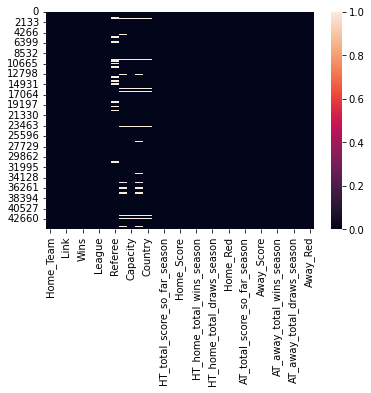

In [28]:
sns.heatmap(model_df.isnull())

There is a number of NaN values related to stadium and location information<br>
#Referee                         4333<br>
#Stadium                         3198<br>
#Capacity                        1320<br>
#Pitch                           3503<br>
#Country                         1320


In [29]:
model_df.isnull().sum()

Home_Team                          0
Away_Team                          0
Link                               0
Result                             0
Wins                               0
Season                             0
League                             0
Round                              0
Referee                         4333
Stadium                         3198
Capacity                        1320
Pitch                           3503
Country                         1320
HT_Link                            0
HT_total_score_so_far_season       0
Elo_home                           0
Home_Score                         0
HT_home_total_scores_season        0
HT_home_total_wins_season          0
HT_home_total_losses_season        0
HT_home_total_draws_season         0
Home_Yellow                        0
Home_Red                           0
AT_Link                            0
AT_total_score_so_far_season       0
Elo_away                           0
Away_Score                         0
A

Some missing values can be obtained from the stadium dataset. <br>
The missing data is added to the temp dataframe and later is merged to the initial model training set


In [30]:
link3='https://aicore-files.s3.amazonaws.com/Data-Science/Team_Info.csv'
stadium_df = pd.read_csv(link3)
missing_info=pd.DataFrame()
missing_info['Home_Team']=model_df[model_df['Country'].isna()]['Home_Team'].unique()
missing_info['Team']=model_df[model_df['Country'].isna()]['Home_Team'].unique()
missing_info.at[0,'Team']='Mönchengladbach'
missing_info.at[1,'Team']='Eintracht'
missing_info.at[2,'Team']='Fortuna'
missing_info.at[3,'Team']='Evian Thonon Gail.'
missing_info.at[4,'Team']='Olympique'
missing_info.at[5,'Team']='Queens Park Range.'
missing_info.at[6,'Team']='West Bromwich Alb.'
missing_info.at[7,'Team']='Paços Ferreira'
missing_info.at[8,'Team']='Vitória'
missing_info.at[9,'Team']='Gimnàstic'
missing_info.at[10,'Team']='Würzburger'
missing_info.at[11,'Team']='Brighton Hove Alb.'
missing_info.at[12,'Team']='Sheffield'
missing_info=pd.merge(missing_info,stadium_df, how='left', on='Team')
missing_info.drop(['Team','City'],inplace=True, axis=1)
model_df = model_df.merge(missing_info,on='Home_Team',how="left")
model_df['Stadium_x'] = model_df['Stadium_y'].fillna(model_df['Stadium_x'])
model_df['Capacity_x'] = model_df['Capacity_y'].fillna(model_df['Capacity_x'])
model_df['Pitch_x'] = model_df['Pitch_y'].fillna(model_df['Pitch_x'])
model_df['Country_x'] = model_df['Country_y'].fillna(model_df['Country_x'])
model_df.drop(['Capacity_y','Stadium_y','Pitch_y','Country_y'], inplace=True, axis=1)
model_df.rename(columns={'Capacity_x':'Capacity','Stadium_x':'Stadium',\
    'Pitch_x':'Pitch','Country_x':'Country'},inplace=True)
model_df['Capacity']=model_df['Capacity'].str.replace(',','')
model_df['Capacity']=model_df['Capacity'].astype('Int64')
model_df.isnull().sum()

Home_Team                          0
Away_Team                          0
Link                               0
Result                             0
Wins                               0
Season                             0
League                             0
Round                              0
Referee                         4333
Stadium                         1878
Capacity                           0
Pitch                           2211
Country                            0
HT_Link                            0
HT_total_score_so_far_season       0
Elo_home                           0
Home_Score                         0
HT_home_total_scores_season        0
HT_home_total_wins_season          0
HT_home_total_losses_season        0
HT_home_total_draws_season         0
Home_Yellow                        0
Home_Red                           0
AT_Link                            0
AT_total_score_so_far_season       0
Elo_away                           0
Away_Score                         0
A

The updated dataset contained the following number of NaN values: <br>
- Referee                         4333 
- Stadium                         1878 
- Pitch                           2211

The final step of the data preparation: 
<br>
- Fill up referees and missing stadium/pitch data with 'unknown'
- The result is clear/ data has no NaN values.

<AxesSubplot:>

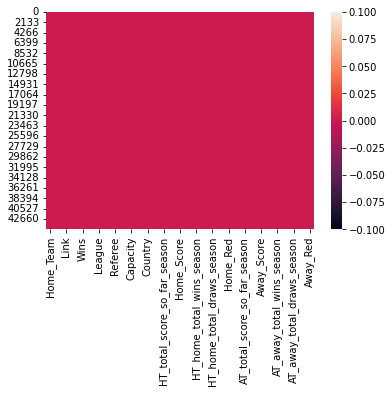

In [31]:
model_df.fillna('uknown', inplace=True)
sns.heatmap(model_df.isnull())

## 3. Some brief visual data presentations

Visualise the spectrum of the home-team wins, which is our outcome for the model training

[Text(0.5, 1.0, 'Countrplot of Output Variable "WINS"')]

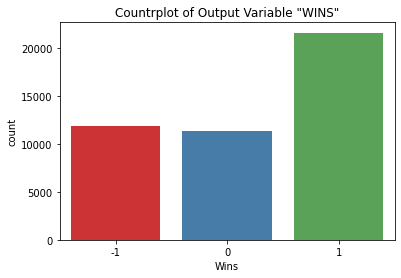

In [32]:
sns.countplot(x='Wins', data=model_df, palette='Set1').\
    set(title='Countrplot of Output Variable "WINS"')


Why does "Second League" show so much more Home Wins?

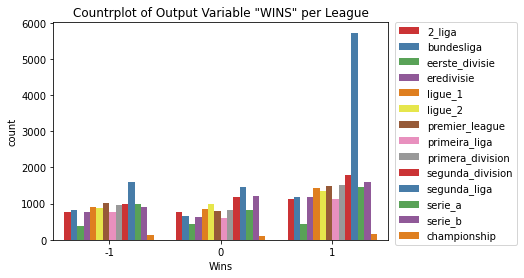

In [33]:
sns.countplot(x='Wins', hue='League', data=model_df, palette='Set1').\
    set(title='Countrplot of Output Variable "WINS" per League')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Second League home team is heavily geared towards win.

[Text(0.5, 1.0, 'Countrplot of Output Variable "WINS" for Second League')]

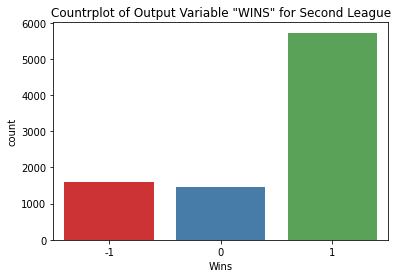

In [34]:
sns.countplot(x='Wins', data=model_df[model_df['League']=='segunda_liga'], palette='Set1').\
    set(title='Countrplot of Output Variable "WINS" for Second League')

Season 2020 is significantly unbalanced towards home-wins

[Text(0.5, 1.0, 'Boxplot of Seasons according to home wins')]

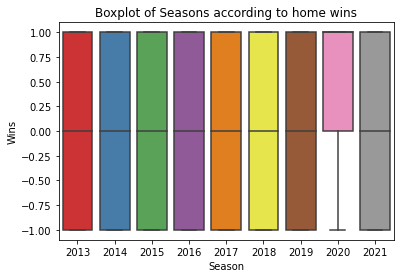

In [35]:
sns.boxplot(x='Season', y='Wins', data=model_df, palette='Set1').\
    set(title='Boxplot of Seasons according to home wins')

Further box-plot shows there are still some results diverstiy

[Text(0.5, 1.0, 'Countrplot of Output Variable "WINS" in 2020')]

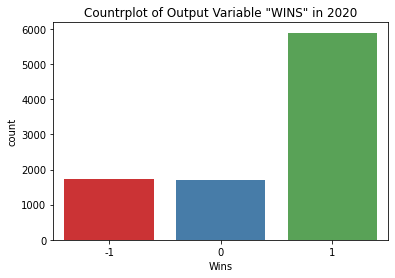

In [36]:
sns.countplot(x='Wins', data=model_df[model_df['Season']==2020], palette='Set1').\
    set(title='Countrplot of Output Variable "WINS" in 2020')

Finally, let's look at distributions of features, to consider normalisation or standartisation.
This is done only on the numeric variables, thus we drop the categorical for this histogram.

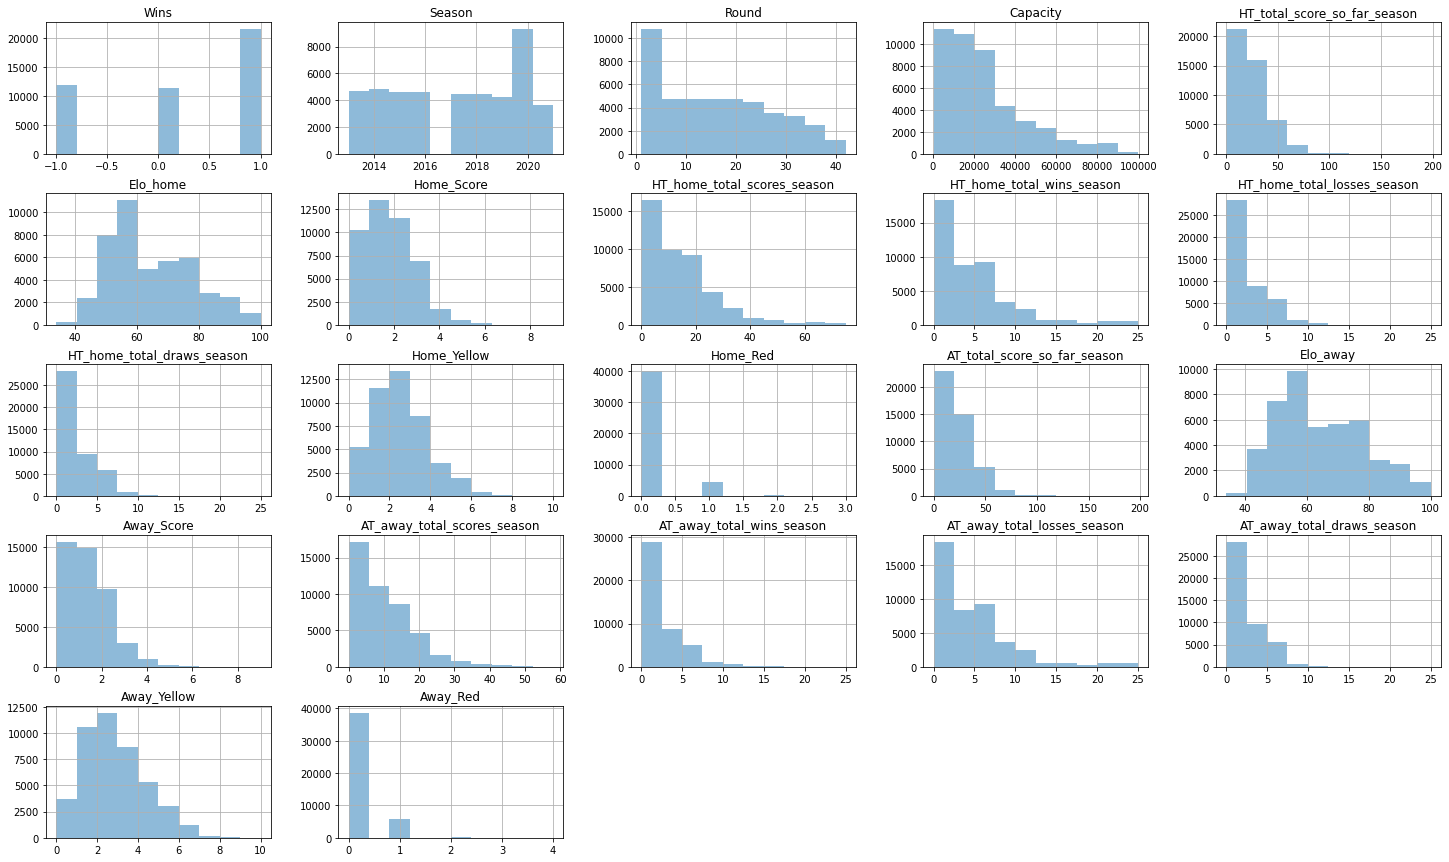

In [37]:
hist_df=model_df.drop(['Home_Team', 'Away_Team', 'League', 'Referee', 'Pitch', \
    'Country', 'Link','Result','HT_Link','AT_Link','Stadium'], axis=1)
hist_df.hist(alpha=0.5, figsize=(25, 15))
plt.show()

Gaussian Distribution (we are going to Standardize) — Season, Elo_home, Home_Yellow, Elo_away, Away_Yellow

Non-Gaussian Distribution (we are going to Normalize) — 'Round', 'Capacity', 'HT_total_score_so_far_season', 'Home_Score', 'HT_home_total_scores_season', 'HT_home_total_wins_season', 'HT_home_total_losses_season', 'HT_home_total_draws_season', 'Home_Red', 'AT_total_score_so_far_season', 'Away_Score', 'AT_away_total_scores_season', 'AT_away_total_wins_season', 'AT_away_total_losses_season', 'AT_away_total_draws_season', 'Away_Red'

## 4. MODEL TRAINING

### Step 1: 
- We are going to create different pipelines for different variables, identified above;
- Then build the Logistic Regression model on the data (excluding categorical variables) with selective features for Standardization and Normalization.


In [38]:
Standardize_Var = ['Season', 'Elo_home', 'Home_Yellow', 'Elo_away', 'Away_Yellow']
Standardize_transformer = Pipeline(steps=[('standard', StandardScaler())])
Normalize_Var = ['Round', 'Capacity', 'HT_total_score_so_far_season', 'Home_Score', 'HT_home_total_scores_season', 'HT_home_total_wins_season',\
    'HT_home_total_losses_season', 'HT_home_total_draws_season', 'Home_Red', 'AT_total_score_so_far_season', 'Away_Score', \
    'AT_away_total_scores_season', 'AT_away_total_wins_season', 'AT_away_total_losses_season', 'AT_away_total_draws_season', 'Away_Red']
Normalize_transformer = Pipeline(steps=[('norm', MinMaxScaler())])

Y=hist_df.Wins
X=hist_df.drop('Wins', axis=1)
columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

preprocessor = ColumnTransformer(transformers=[('standard', Standardize_transformer, Standardize_Var),('norm', Normalize_transformer, Normalize_Var)])
model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(solver='lbfgs'))])
model.fit(X_train, y_train)
print('Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: {:.2f}'\
    .format(model.score(X_test, y_test)))

Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: 1.00


/home/irinakw/miniconda3/envs/football_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
prediction=model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2377
           0       0.99      1.00      1.00      2251
           1       1.00      1.00      1.00      4329

    accuracy                           1.00      8957
   macro avg       1.00      1.00      1.00      8957
weighted avg       1.00      1.00      1.00      8957



In [40]:
print(accuracy_score(y_test, prediction))

0.9975438204756056


### Step 2: Create dummies for categorical values

In [41]:
#Dummying categorical variables to get ready for the model training
#Home_Team
Home_Team=pd.get_dummies(model_df['Home_Team'], drop_first=True)
#Away_Team
Away_Team=pd.get_dummies(model_df['Away_Team'], drop_first=True)
#League
League=pd.get_dummies(model_df['League'], drop_first=True)
#Referee
Referee=pd.get_dummies(model_df['Referee'], drop_first=True)
#Pitch
Pitch=pd.get_dummies(model_df['Pitch'], drop_first=True)
#Country
Country=pd.get_dummies(model_df['Country'], drop_first=True)
#Drop unnecessary columns and concatinate with dummies
model_df.drop(['Home_Team', 'Away_Team', 'League', 'Referee', 'Pitch', \
    'Country', 'Link','Result','HT_Link','AT_Link','Stadium'], axis=1, inplace=True)
model_df=pd.concat([model_df, Home_Team, Away_Team, League, Referee, Pitch, Country], axis=1)